# jet_model  user guide 


## basic  setup

In [1]:
%matplotlib inline
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [2]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: 
lppl_pile_up: 
bkn_pile_up: 


In [3]:
my_jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +1.000000e+04 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

In [4]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-----------

as you can notice, you can now access further information regarding the model, such as numerical configuration of the grid. These parameters will be discussed 
in the :ref:`jet_numerical_guide' section

## setting the parameters

In [5]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=14.5)
my_jet.set_par('N',val=1E3)

In [6]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [7]:
my_jet.eval()

In [8]:
my_jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +2.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+03 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.450000e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +5.000000e+03 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

and plot the corresponding SED:


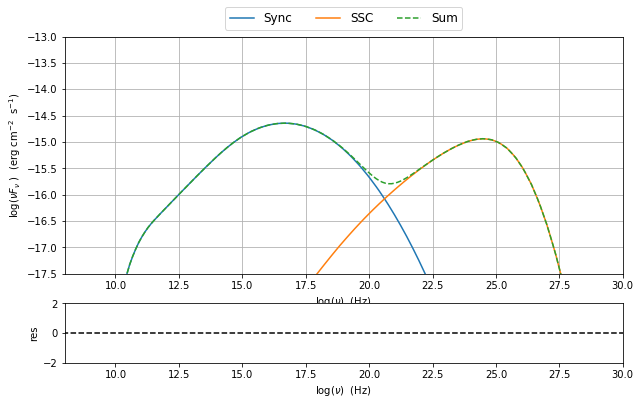

In [9]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

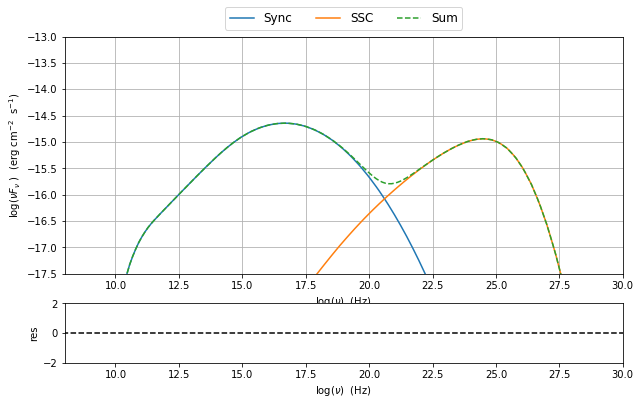

In [10]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

the ``my_plot`` objet returned will be built on the fly by the  ``plot_model`` method

## comparing models on the same plot

to compare the same model after changing a parameter

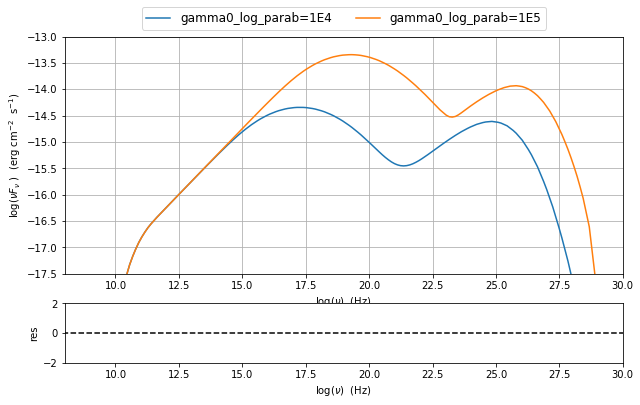

In [11]:
my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## saving a plot

to save the plot

In [12]:
my_plot.save('jet1.png')

## saving and lodaing  a model

In [13]:
my_jet.save_model('test_model.dat')

In [14]:
my_jet_new=Jet.load_model('test_model.dat')

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +1.000000e+04 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

## set  N, the density of electrons from observed Flux

In [15]:
my_jet.Norm_distr

1

In [16]:
my_jet.switch_Norm_distr_OFF()

In [ ]:
my_jet.switch_Norm_distr_ON()

## set  N, the density of electrons from observed Flux

In [19]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [20]:
my_jet.parameters.N.val

100.0

In [30]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [31]:
my_jet.get_par_by_name('N').val

249.04461454958587

In [28]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +2.490446e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

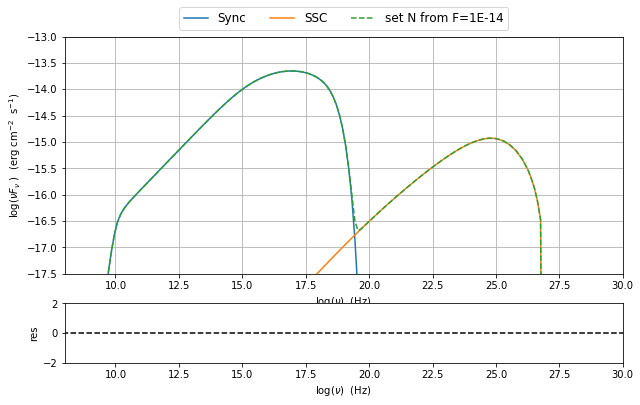

In [29]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [37]:
my_jet.set_N_from_nuLnu(L_0=1E43,nu_0=1E15)

## setting beaming factor

It is possible to set the bemaing factor according to the realativistic BulkFactor and viewing angle, this can be done by setting the ``beaming_expr`` kw in the Jet constructor, possbile choiches are

* `delta` to provide directly the beaming factor (default)
* `bulk_theta` to provide the BulkFactor and the jet  viewing angle 

In [40]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [41]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

In [42]:
my_jet.get_beaming()

19.943844732554165

In [31]:
my_jet.set_par('theta',val=10.)

In [43]:
my_jet.get_beaming()

19.943844732554165

In [33]:
my_jet=jet_model.Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [44]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

## accessing individual components

It is possible to access specific spectral components of oura model

In [46]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [47]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [48]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [49]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [38]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [39]:
print (nuFnu_sync)

[1.00000000e-30 1.00000000e-30 1.00000000e-30 1.00000000e-30
 1.00000000e-30 1.00000000e-30 1.00000000e-30 1.00000000e-30
 1.00000000e-30 1.00000000e-30 1.00000000e-30 1.99195355e-26
 4.32084831e-26 9.42080231e-26 2.07796467e-25 4.64226006e-25
 1.07421835e-24 2.57262866e-24 6.33304102e-24 1.62172378e-23
 4.21830732e-23 1.10565753e-22 2.90749001e-22 7.64703810e-22
 2.01137205e-21 5.29044499e-21 1.39152631e-20 3.66005742e-20
 9.62674977e-20 2.53161731e-19 6.65135791e-19 1.74532879e-18
 4.47162406e-18 1.04798662e-17 2.22510780e-17 3.42183006e-17
 4.73795507e-17 5.98146121e-17 7.08393890e-17 8.27924884e-17
 9.58571035e-17 1.10361592e-16 1.26894305e-16 1.45793212e-16
 1.67429058e-16 1.92253041e-16 2.20741484e-16 2.53430172e-16
 2.90956596e-16 3.34034909e-16 3.83482107e-16 4.40231844e-16
 5.05364252e-16 5.80111171e-16 6.65860835e-16 7.64238867e-16
 8.77094393e-16 1.00644889e-15 1.15473841e-15 1.32470643e-15
 1.51922268e-15 1.74184487e-15 1.99657203e-15 2.28728218e-15
 2.61887108e-15 2.996993